<a href="https://colab.research.google.com/github/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/notebooks-tp/Aprendizaje_Supervisado_MEV_TP_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mentoria: Monitoreo de Espacios Verdes

__DIPLODATOS 2022 - FAMAF UNC__

_Felix Rojo Lapalma_

## Aprendizaje Supervisado

En esta etapa ya hemos avanzado en

- [TP-Analisis-Visualizacion](https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/notebooks-tp/Analisis-y-Visualizacion-MEV-TP.ipynb):

  - análisis y exploración del conjunto de datos (aunque sea superficialmente)
  - set representativo: Es decir, aprendimos que podemos llegar a trabajar con un set mas reducido (de las caracteristicas - columnas del dataframe) e igualmente vamos a estar representando gran parte del conjunto.
  - inputacion de valores:   
    - tenemos formas de inputar valores en rangos temporales que no tenemos (para una cierta zona) utilizando otros rangos temporales (aqui aprovechamos fuertemente la estacionalidad de lo que estamos monitoreando)
    - que un outlier en un rango temporal puede ser un valor nominal en otro rango temporal.
  - etc

- [TP-Exploracion-y-Curación](https://drive.google.com/file/d/1-E0ijX7LTRczoAwYG7eAyfDb5PElyEfi/view?usp=sharing):

 - "Curación" de nuestro dataset con diferentes recetas. Por curar nos referimos a generar los procesos necesarios (trazables y reproducibles) que nos lleven del conjunto original de datos (que debe permanecer inmutable) hasta un conjunto que pueda ser consumido por distintos algorimos de aprendizaje. Entre ellos:
    - filtrado
    - imputacion de valores
    - etc

Es decir en esta instancia ya contamos con las recetas o procesos que nos permiten, partiendo del set de datos crudos pasar a un dataset listo para ser consumidos por los modelos de aprendizaje supervisado que seleccionemos.
 
### Fuentes

El presente trabajo práctico está inspirado en los correspondientes de:

- [jbergamasco2019](https://github.com/jbergamasco/DiploDatos2019)

- [TP-Analisis-Visualizacion](https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/notebooks-tp/Analisis-y-Visualizacion-MEV-TP.ipynb)

- [TP-Exploracion-y-Curación](https://drive.google.com/file/d/1-E0ijX7LTRczoAwYG7eAyfDb5PElyEfi/view?usp=sharing)

## Sobre el Trabajo Requerido

En este trabajo proponemos  explorar y aplicar lo aprendido en el curso (Aprendizaje Supervisado) integrandolo con lo desarrollado en los prácticos de Análisis y visualización y el correspondiente a Exploración y Curación de datos.

### Conceptual

Algunas de las preguntas que deberemos responder (avanzando en el TP):

- ¿Cual seria el problema que pretendemos resolver utilizando Aprendizaje Supervisado? ¿Es un problema de clasificación o de regresion? Que distingue a uno de otro?

- ¿Es suficiente un solo modelo? ¿Que tan importante es la parte temporal? ¿Necesitamos que sea estacional?

- ¿Es necesario utilizar todas las bandas del raster o con ciertos indices es suficiente? (Esto ya lo respondio parcialmente en las TPs anteriores)

- ¿Podríamos utilizar los modelos para detectar alguna clase de anomalía en el comportamiento de una dada región? ¿Como? 

- ¿Piensa que podriamos utilizar el enfoque actual (OBIA- Object-based Image Analysis) para clasificar a nivel de pixel? ¿Que deberiamos suponer o asumir para que esto sea valido?*

*_Comentario_: _Si bien no lo mencionamos en forma explicita la forma de seleccionar y computar las diferentes propiedades en los rasters para la creacion del dataset implico el acceso a nivel de objetos o zonas. No se realizo un analisis de pixel sino a nivel de un "conjunto" de pixeles._

### Hands-on

A nivel de implementacion vamos a requerir la aplicación de diferentes modelos sobre el conjunto de datos (al menos 2 de ellos):

- [ExtraTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.ExtraTreeClassifier.html#sklearn.tree.ExtraTreeClassifier)
- [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier)
- [XGBoost](https://xgboost.readthedocs.io/en/stable/)

#### Pasos

1. Descarga del Set de Datos$^1$
2. Curacion (Recetas TP Exploración y Curación)
3. Generacion de Features Extras$^2$
4. Split Dataset
5. Entrenamiento del Modelo
  - [a] Grid Search
  - [b] tunning de Hiperparametros
6. Presentacion de Resultados y Metricas


### Que Presentar?

Set de Notebooks en los cuales se apliquen 2 modelos al menos de los mencionados junto al menos 3 de las recetas generadas en el TP de Exploracion y Curación. Para ello puede seguir los pasos del step anterior. 
En el curso del TP debemos poder responder (adicionalmente):
- ¿Que receta parece otorgar el mejor ratio de costo/beneficio? Respecto a este punto considere que muchas veces el mayor "accuracy" (por solo nombrar una metrica) no significa el mayor beneficio. Esto se puede entender si consideramos que un modelo no se reduce solo a su inferencia, sino a todos lo pasos que nos permiten llevarla adelante.
- Respecto a los modelos, para los `Trees` es necesario normalizar los datos? y para `XGB`?
- Intuitivamente uno pensaria que los clasificadores deberian andar mejor en los espacios mas grandes (o de mayor area). Tiene alguna forma de corroborar o refutar esta idea?

- Si el modelo fuera utilizado para identificar anómalias en espacios verdes,sobre que preferiria tener mayor efectividad? (el conocido dilema ¿Precision o Recall?) Es decir que proporcion de los espacios verdes identificados como sanos estaban sanos? (Precision) o que proporcion de los espacios verdes actualmente sanos, fueron identificados como tales? (Recall)
Como ayuda piense las implicancias (mas allá del espacio verde en si) de marcar siempre en falta algun sitio (logistica, transporte, etc).


$^1$ Para esta etapa hemos adicionado al set de datos originales un set de [espacios "no-verdes"](https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/data/ab-initio-dataset-build.md#espacios-no-verdes-o-indefinidos). Esto con el fin de tener un esquema claro de separacion "verde/No-verde" para ayudarlo en el entrenamiento de su sistema. 
Para poder utilizarlo le recomendamos que lo procese en forma similar al dataset original (puede utilizar las mismas recetas). Una vez procesado cada uno por su cuenta y con los label correspondientes, puede unificar los datasets en uno único. Puede consultar [estructura-datos](https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/data/estructura-datos.md) para ver las diferencias (minimas) entre los datasets.

$^2$ Respecto al paso 3, mencionamos que puede ser necesario la generacion adicional de algun feature extra a posteriori de la receta (esto podria incorporarse en la receta si se considera beneficioso). Recuerde que los procesos de Ciencia de Datos son altamente no lineales y de iteracion continua (al menos en su fase inicial). Particualarmente la generacion de features relacionados a fechas, meses, estaciones, DOY (day of year) o WOY (weak of year) pueden resultarle util para responder algunas de las preguntas conceptuales.

__EXTRA__: Set de pasos descriptivos que seguiria para poder implementar/responder la ultima de las preguntas conceptuales (OBIA vs PBIA- pixel based image analysis).

__EXTRA$^2$__: Implementación en codigo de __EXTRA__ 


Cada una de las notebooks tiene que tener la secuencia propuesta (o variaciones debidamente justificadas). Con las metricas utilizadas, matrices de confusion, etc. Se valorará analisis de tradeoff (o costo beneficio) entre los modelos y las recetas utilizadas.


## [1] Descarga de Datos

In [1]:
import pandas as pd
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
    # running on colab
    # from link @ https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/data/ab-initio-dataset-build.md
    !gdown https://drive.google.com/file/d/1tgbIQaEXzIghcFYyd2YM9iMho4TDHHFd/view?usp=sharing --fuzzy
    !gdown https://drive.google.com/file/d/1mfir4DZxT3g9tQkPJzCAZYy2VS2VHp7O/view?usp=sharing --fuzzy
    # Notar el cambio del path y el tipo de archivo (no lo descomprimimos)
    df_verde=pd.read_csv('/content/espacios-verdes-indexs-cba-20170101-20220420.zip',index_col=0)
    df_no_verde=pd.read_csv('/content/espacios-NO-verdes-indexs-cba-20170101-20220420.zip',index_col=0)
else:
    # recuerde descargar el dataset desde los links mencionados en el README
    df_verde=pd.read_csv('../data/cba/espacios-verdes-indexs-cba-20170101-20220420.csv',index_col=0)
    df_no_verde=pd.read_csv('/data/cba/espacios-NO-verdes-indexs-cba-20170101-20220420.csv',index_col=0)

Running on CoLab
Downloading...
From: https://drive.google.com/uc?id=1tgbIQaEXzIghcFYyd2YM9iMho4TDHHFd
To: /content/espacios-verdes-indexs-cba-20170101-20220420.zip
100% 170M/170M [00:01<00:00, 142MB/s]
Downloading...
From: https://drive.google.com/uc?id=1mfir4DZxT3g9tQkPJzCAZYy2VS2VHp7O
To: /content/espacios-NO-verdes-indexs-cba-20170101-20220420.zip
100% 78.7M/78.7M [00:00<00:00, 157MB/s]


In [2]:
df_verde.head()

,B02_min,B02_max,B02_mean,B02_median,B02_nodata,B02_range,B02_count,B03_min,B03_max,B03_mean,...,sipi_median,sipi_nodata,sipi_range,sipi_count,raster,clouds_on_raster,osm_id,name,area_m2,date
0,0.0871,0.1421,0.102570,0.09650,0.0,0.0550,47,0.0768,0.1516,0.098885,...,0.884216,0.0,0.453065,47,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,605976736,NaN,4650.710032,2017-01-03
1,0.0970,0.1936,0.118354,0.10660,0.0,0.0966,13,0.1006,0.1949,0.122154,...,0.971875,0.0,0.247045,13,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,559322368,NaN,1502.000513,2017-01-03
2,0.0992,0.1273,0.111805,0.11290,0.0,0.0281,19,0.1037,0.1369,0.117795,...,0.973017,0.0,0.207006,19,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,559322369,NaN,2004.192528,2017-01-03
3,0.0995,0.1933,0.118491,0.11355,0.0,0.0938,66,0.0993,0.1990,0.124512,...,0.966202,0.0,0.258424,66,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,559328111,NaN,6940.507640,2017-01-03
4,0.1059,0.1385,0.122453,0.12240,0.0,0.0326,47,0.1036,0.1580,0.132455,...,0.993986,0.0,0.260419,47,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,559328112,NaN,4587.356048,2017-01-03


In [3]:
df_no_verde.head()

,B02_min,B02_max,B02_mean,B02_median,B02_nodata,B02_range,B02_count,B03_min,B03_max,B03_mean,...,sipi_nodata,sipi_range,sipi_count,raster,clouds_on_raster,osm_id,name,area_m2,desc,date
0,0.0894,0.3261,0.165313,0.15350,0.0,0.2367,313,0.0827,0.3737,0.168369,...,0.0,88.165550,313,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,259-nev,undefined,31365.484905,Barrio,2017-01-03
1,0.0950,0.5436,0.166934,0.14690,0.0,0.4486,317,0.0927,0.5340,0.170916,...,0.0,69.959171,317,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,237-nev,undefined,31365.484905,Barrio-Zona-Verde,2017-01-03
2,0.0867,0.3236,0.163555,0.15535,0.0,0.2369,314,0.0807,0.3693,0.164975,...,0.0,52.476419,314,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,236-nev,undefined,31365.484905,Barrio-Zona-Verde,2017-01-03
3,0.0874,0.3107,0.134499,0.13110,0.0,0.2233,315,0.0776,0.3101,0.132847,...,0.0,35.171722,315,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,235-nev,undefined,31365.484905,Barrio-Zona-Verde,2017-01-03
4,0.0826,0.2872,0.127382,0.11620,0.0,0.2046,313,0.0722,0.3367,0.124013,...,0.0,1.484326,313,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,234-nev,undefined,31365.484905,Barrio-Zona-Verde,2017-01-03


- asignacion de clase
- seleccion de las bandas, indices indicados a continuacion (en su mediana) y algunos componentes extras.

In [4]:
# actualizamos los dataframes con la asignacion de clase
df_verde['target']=1 # espacio verde
df_no_verde['target']=0 # espacio NO verde -> En primera instancia suponemos todos espacios no verdes

In [5]:
case= ['B02_median',
 'B03_median',
 'B04_median',
 'B05_median',
 'B07_median',
 'B08_median',
 'B11_median',
 'ndvi_median',
 'mNDVI_median',
 'osavi_median',
 'tcari_median',
 'clouds_on_raster',
 'raster',
 'osm_id',
 'area_m2',
 'date',
 'target'];

In [6]:
# get case
df_vf=df_verde[case] 
df_nvf=df_no_verde[case]

## 2. Curación (Receta Minimal)

- Drop NaN
- Filter Clouds on Raster (< 30%)

In [7]:
df_0=pd.concat([df_vf.dropna(),df_nvf.dropna()])
df_1=df_0[df_0['clouds_on_raster']<31]
df_1.head()

,B02_median,B03_median,B04_median,B05_median,B07_median,B08_median,B11_median,ndvi_median,mNDVI_median,osavi_median,tcari_median,clouds_on_raster,raster,osm_id,area_m2,date,target
0,0.09650,0.09340,0.0779,0.1157,0.2459,0.2645,0.18770,0.547001,1.301351,0.435000,0.093993,0.0,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,605976736,4650.710032,2017-01-03,1
1,0.10660,0.11010,0.0988,0.1482,0.3080,0.3329,0.25420,0.534292,1.059602,0.453745,0.103725,0.0,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,559322368,1502.000513,2017-01-03,1
2,0.11290,0.11870,0.1062,0.1405,0.3116,0.3415,0.24640,0.525454,1.057045,0.448569,0.092038,0.0,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,559322369,2004.192528,2017-01-03,1
3,0.11355,0.11865,0.1037,0.1512,0.3647,0.3928,0.26675,0.593190,1.072501,0.515213,0.112404,0.0,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,559328111,6940.507640,2017-01-03,1
4,0.12240,0.13190,0.1219,0.1722,0.3450,0.3773,0.28950,0.508717,1.012175,0.447423,0.123183,0.0,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,559328112,4587.356048,2017-01-03,1


## 3. Generacion de Features Extras

In [8]:
def prc_dates(df,col='date',drop_col=True):

  df[col]=pd.to_datetime(df[col])
  df['month']=df[col].apply(lambda x: x.month)
  df['year']=df[col].apply(lambda x: x.year)
  df['week']=df[col].apply(lambda x:float(x.strftime('%U')))
  if drop_col:
    df.drop(col,axis=1,inplace=True)
  return df

In [9]:
df_2=prc_dates(df_1.copy())
df_2.head()

,B02_median,B03_median,B04_median,B05_median,B07_median,B08_median,B11_median,ndvi_median,mNDVI_median,osavi_median,tcari_median,clouds_on_raster,raster,osm_id,area_m2,target,month,year,week
0,0.09650,0.09340,0.0779,0.1157,0.2459,0.2645,0.18770,0.547001,1.301351,0.435000,0.093993,0.0,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,605976736,4650.710032,1,1,2017,1.0
1,0.10660,0.11010,0.0988,0.1482,0.3080,0.3329,0.25420,0.534292,1.059602,0.453745,0.103725,0.0,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,559322368,1502.000513,1,1,2017,1.0
2,0.11290,0.11870,0.1062,0.1405,0.3116,0.3415,0.24640,0.525454,1.057045,0.448569,0.092038,0.0,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,559322369,2004.192528,1,1,2017,1.0
3,0.11355,0.11865,0.1037,0.1512,0.3647,0.3928,0.26675,0.593190,1.072501,0.515213,0.112404,0.0,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,559328111,6940.507640,1,1,2017,1.0
4,0.12240,0.13190,0.1219,0.1722,0.3450,0.3773,0.28950,0.508717,1.012175,0.447423,0.123183,0.0,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,559328112,4587.356048,1,1,2017,1.0


4. Split Dataset

In [10]:
from sklearn.model_selection import train_test_split
#
def pd_Xy_splitter(pd_in,x_list,y_list):
    # dummy function to split pd
    if y_list!=None:
        X,y= pd_in.loc[:,x_list],pd_in.loc[:,y_list]
    else:
        X,y= pd_in.loc[:,x_list],None    
    return X,y


In [11]:
x_case= ['B02_median',
 'B03_median',
 'B04_median',
 'B05_median',
 'B07_median',
 'B08_median',
 'B11_median',
 'ndvi_median',
 'mNDVI_median',
 'osavi_median',
 'tcari_median',
 'area_m2',
 'month',
 'week'
 ];
y_case=['target']

In [12]:
XY_train,XY_test=train_test_split(df_2,test_size=0.3,random_state=1)
#
X_train,Y_train = pd_Xy_splitter(XY_train,x_case,y_case)
X_test,Y_test = pd_Xy_splitter(XY_test,x_case,y_case)

In [13]:
# helpers
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import itertools
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,color_bar=False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    if color_bar:
        plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta correcta')
    plt.xlabel('Etiqueta predicha')

def print_plot_classification_report(model,X_case,Y_case,Case,plotFlag=False,classes_list=['NO_CASE','CASE']):
    print(Case)
    print("Reporte de clasificación para el mejor clasificador (sobre conjunto " + Case+"):", end="\n\n")
    y_true, y_pred = Y_case, model.predict(X_case)
    cr_pd=classification_report(y_true, y_pred,target_names=classes_list)
    cr_dict=classification_report(y_true, y_pred,target_names=classes_list,output_dict=True)
    print(cr_pd, end="\n\n")
    print("================================================", end="\n\n")
    if plotFlag:
        plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                      classes=classes_list, title= Case)
        plt.show()
    return cr_dict

## 5. Entrenamiento

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
rf=RandomForestClassifier(n_estimators=5,max_depth=5,min_samples_split=10)


### Train

In [16]:
#Case
X_case=X_train; Y_case=Y_train ; Case= 'TRAIN';

model=rf
# Fit
model.fit(X_case,Y_case.values.ravel())

RandomForestClassifier(max_depth=5, min_samples_split=10, n_estimators=5)

### 6. Resultados

TRAIN
Reporte de clasificación para el mejor clasificador (sobre conjunto TRAIN):

              precision    recall  f1-score   support

    NO_VERDE       0.97      1.00      0.99     51778
       VERDE       1.00      0.99      0.99    111064

    accuracy                           0.99    162842
   macro avg       0.99      0.99      0.99    162842
weighted avg       0.99      0.99      0.99    162842





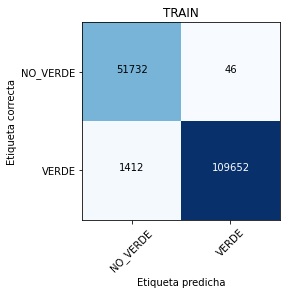

{'NO_VERDE': {'precision': 0.973430678910131,
  'recall': 0.9991115917957434,
  'f1-score': 0.9861039629439012,
  'support': 51778},
 'VERDE': {'precision': 0.9995806669219129,
  'recall': 0.9872866095224375,
  'f1-score': 0.9933956025040541,
  'support': 111064},
 'accuracy': 0.9910465359059702,
 'macro avg': {'precision': 0.986505672916022,
  'recall': 0.9931991006590905,
  'f1-score': 0.9897497827239776,
  'support': 162842},
 'weighted avg': {'precision': 0.9912658950616187,
  'recall': 0.9910465359059702,
  'f1-score': 0.9910771188625759,
  'support': 162842}}

In [17]:
print_plot_classification_report(model,X_case,Y_case,Case,plotFlag=True,classes_list=['NO_VERDE','VERDE'])

TEST
Reporte de clasificación para el mejor clasificador (sobre conjunto TEST):

              precision    recall  f1-score   support

    NO_VERDE       0.97      1.00      0.99     21925
       VERDE       1.00      0.99      0.99     47865

    accuracy                           0.99     69790
   macro avg       0.99      0.99      0.99     69790
weighted avg       0.99      0.99      0.99     69790





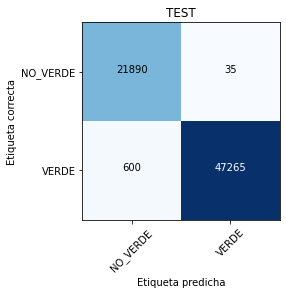

{'NO_VERDE': {'precision': 0.9733214762116497,
  'recall': 0.9984036488027366,
  'f1-score': 0.9857030282562198,
  'support': 21925},
 'VERDE': {'precision': 0.9992600422832981,
  'recall': 0.9874647445941711,
  'f1-score': 0.9933273787632008,
  'support': 47865},
 'accuracy': 0.9909012752543345,
 'macro avg': {'precision': 0.9862907592474739,
  'recall': 0.9929341966984538,
  'f1-score': 0.9895152035097103,
  'support': 69790},
 'weighted avg': {'precision': 0.9911112665113982,
  'recall': 0.9909012752543345,
  'f1-score': 0.9909321375414561,
  'support': 69790}}

In [18]:
X_case_test=X_test; Y_case_test=Y_test ; Case_test='TEST'

print_plot_classification_report(model,X_case_test,Y_case_test,Case_test,plotFlag=True,classes_list=['NO_VERDE','VERDE'])


## 5. Entrenamiento (Variante-Scaling)

In [19]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

In [20]:
X_case=X_train; Y_case=Y_train ; Case= 'TRAIN-SCALED';

# Scaler
sc=StandardScaler()

# Booster
rf=RandomForestClassifier()

#make Pipe
pipeline = Pipeline([
    ('sc',sc),
    ('rf', rf),
])

# Param 
opt_params={'rf__max_depth':5, 'rf__min_samples_split':10, 'rf__n_estimators':5}

pipeline.set_params(**opt_params)
#
model=pipeline
# Fit
model.fit(X_case,Y_case.values.ravel())

Pipeline(steps=[('sc', StandardScaler()),
                ('rf',
                 RandomForestClassifier(max_depth=5, min_samples_split=10,
                                        n_estimators=5))])

### 6. Resultados

TRAIN-SCALED
Reporte de clasificación para el mejor clasificador (sobre conjunto TRAIN-SCALED):

              precision    recall  f1-score   support

    NO_VERDE       0.99      0.65      0.79     51778
       VERDE       0.86      1.00      0.92    111064

    accuracy                           0.89    162842
   macro avg       0.93      0.82      0.86    162842
weighted avg       0.90      0.89      0.88    162842





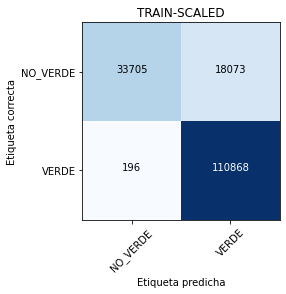

{'NO_VERDE': {'precision': 0.9942184596324593,
  'recall': 0.6509521418363011,
  'f1-score': 0.7867738885841338,
  'support': 51778},
 'VERDE': {'precision': 0.8598351183874795,
  'recall': 0.9982352517467407,
  'f1-score': 0.9238807524843232,
  'support': 111064},
 'accuracy': 0.8878114982621191,
 'macro avg': {'precision': 0.9270267890099694,
  'recall': 0.8245936967915208,
  'f1-score': 0.8553273205342284,
  'support': 162842},
 'weighted avg': {'precision': 0.902564270835758,
  'recall': 0.8878114982621191,
  'f1-score': 0.8802856161004418,
  'support': 162842}}

In [21]:
#
print_plot_classification_report(model,X_case,Y_case,Case,plotFlag=True,classes_list=['NO_VERDE','VERDE'])

TEST-SCALED
Reporte de clasificación para el mejor clasificador (sobre conjunto TEST-SCALED):

              precision    recall  f1-score   support

    NO_VERDE       0.99      0.64      0.78     21925
       VERDE       0.86      1.00      0.92     47865

    accuracy                           0.89     69790
   macro avg       0.93      0.82      0.85     69790
weighted avg       0.90      0.89      0.88     69790





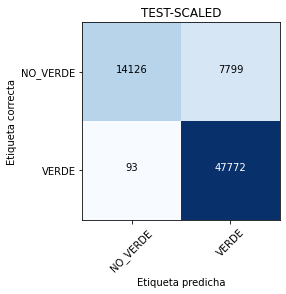

{'NO_VERDE': {'precision': 0.9934594556579225,
  'recall': 0.6442873432155074,
  'f1-score': 0.781651173085436,
  'support': 21925},
 'VERDE': {'precision': 0.8596570153497328,
  'recall': 0.9980570354120966,
  'f1-score': 0.9237016125913609,
  'support': 47865},
 'accuracy': 0.8869178965467832,
 'macro avg': {'precision': 0.9265582355038277,
  'recall': 0.821172189313802,
  'f1-score': 0.8526763928383985,
  'support': 69790},
 'weighted avg': {'precision': 0.90169195593946,
  'recall': 0.8869178965467832,
  'f1-score': 0.8790755073303291,
  'support': 69790}}

In [22]:
X_case_test=X_test; Y_case_test=Y_test ; Case_test='TEST-SCALED'

print_plot_classification_report(model,X_case_test,Y_case_test,Case_test,plotFlag=True,classes_list=['NO_VERDE','VERDE'])